In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [2]:
data = pd.read_csv("handwriting.csv")

In [3]:
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = data.drop(["label"],axis=1).values

In [5]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
Y = data["label"].values

In [7]:
Y

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [8]:
X = X.reshape([60000,28,28,1])
Y = Y.reshape([60000,1])

In [9]:
from keras.utils.np_utils import to_categorical
Y = to_categorical(Y)

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
opt = SGD(learning_rate=0.001, momentum=0.0)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [13]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1500/1500 [==============================] - 59s 33ms/step - loss: 0.4438 - accuracy: 0.8777 - val_loss: 0.2009 - val_accuracy: 0.9392
Epoch 2/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1638 - accuracy: 0.9500 - val_loss: 0.1662 - val_accuracy: 0.9507
Epoch 3/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1251 - accuracy: 0.9618 - val_loss: 0.1398 - val_accuracy: 0.9557
Epoch 4/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.1023 - accuracy: 0.9687 - val_loss: 0.1139 - val_accuracy: 0.9656
Epoch 5/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0884 - accuracy: 0.9724 - val_loss: 0.1165 - val_accuracy: 0.9638
Epoch 6/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0776 - accuracy: 0.9753 - val_loss: 0.1049 - val_accuracy: 0.9685
Epoch 7/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0674 - accuracy: 0.9788 - val_loss: 0.0979 -

In [14]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


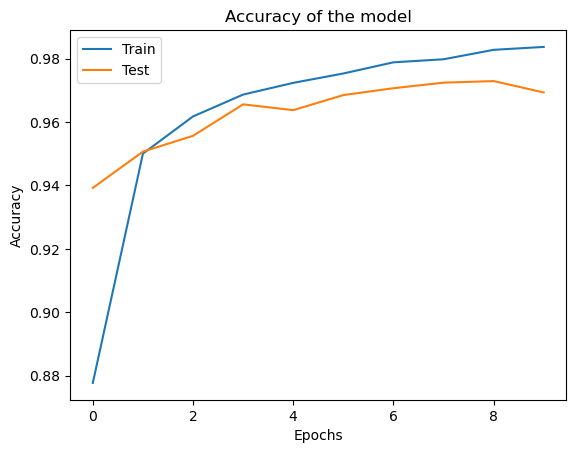

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])

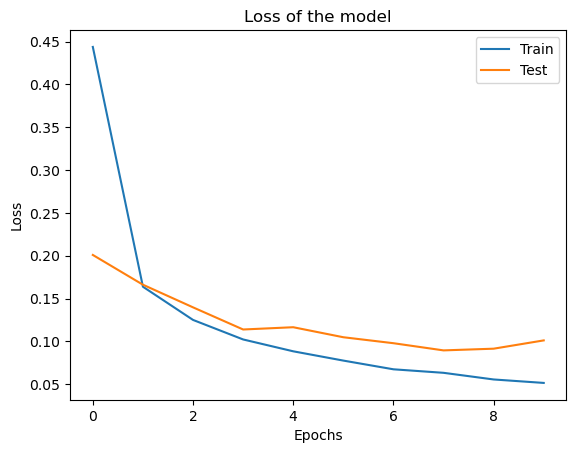

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])